In [1]:
pip install pandas scikit-learn matplotlib seaborn streamlit

  Using cached scikit_learn-1.8.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached matplotlib-3.10.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.4.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (6.6 kB)
  Using cached scipy-1.17.0-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp312-cp312-macosx_10_13_universal2.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached pandas-2.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (91 kB)
  Using ca

In [8]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [11]:
df = pd.read_csv("/Users/rezarahimi/Desktop/Self Study projects/Spam Detection/smsspamcollection/SMSSpamCollection", sep="\t", header=None)
df.columns = ["label", "message"]

print(df.head())
print(df["label"].value_counts())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Convert text to numerical features
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["message"])

y = df["label"]


In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [18]:

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.979372197309417
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



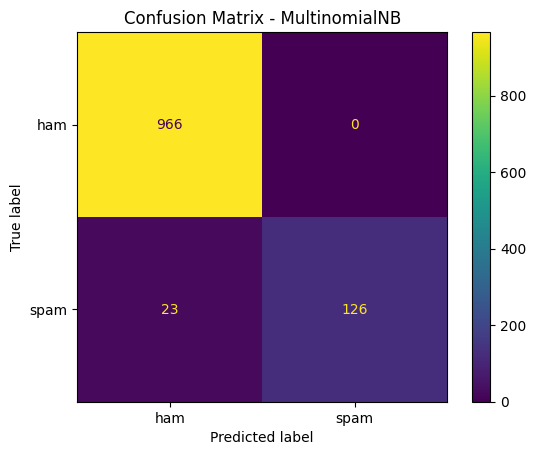

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(values_format="d")
plt.title("Confusion Matrix - MultinomialNB")
plt.show()

In [22]:
from sklearn.metrics import classification_report, accuracy_score

# احتمال‌ها برای هر کلاس
proba = model.predict_proba(X_test)

# اندیس کلاس spam را پیدا کن
spam_idx = np.where(model.classes_ == "spam")[0][0]
spam_proba = proba[:, spam_idx]

def predict_with_threshold(spam_proba, threshold):
    return np.where(spam_proba >= threshold, "spam", "ham")

for t in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    y_pred_t = predict_with_threshold(spam_proba, t)
    print("\nThreshold:", t)
    print("Accuracy:", accuracy_score(y_test, y_pred_t))
    print(classification_report(y_test, y_pred_t, digits=3))


Threshold: 0.1
Accuracy: 0.8959641255605382
              precision    recall  f1-score   support

         ham      0.996     0.883     0.936       966
        spam      0.564     0.980     0.716       149

    accuracy                          0.896      1115
   macro avg      0.780     0.931     0.826      1115
weighted avg      0.939     0.896     0.907      1115


Threshold: 0.2
Accuracy: 0.9713004484304932
              precision    recall  f1-score   support

         ham      0.992     0.975     0.983       966
        spam      0.855     0.946     0.898       149

    accuracy                          0.971      1115
   macro avg      0.923     0.961     0.941      1115
weighted avg      0.973     0.971     0.972      1115


Threshold: 0.3
Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

         ham      0.988     0.994     0.991       966
        spam      0.958     0.919     0.938       149

    accuracy                          0.984    

In [20]:
while True:
    text = input("\nType a message to classify (or 'q' to quit): ").strip()
    if text.lower() == "q":
        break

    x_new = vectorizer.transform([text])   # متن → بردار TF-IDF
    pred = model.predict(x_new)[0]         # برچسب
    proba = model.predict_proba(x_new)[0]  # احتمال هر کلاس

    # ترتیب کلاس‌ها رو از خود مدل می‌گیریم تا اشتباه نشه
    class_probs = dict(zip(model.classes_, proba))

    print("Prediction:", pred)
    print("Probabilities:", class_probs)

Prediction: ham
Probabilities: {np.str_('ham'): np.float64(0.9695112064993464), np.str_('spam'): np.float64(0.0304887935006556)}
Prediction: ham
Probabilities: {np.str_('ham'): np.float64(0.945647100343684), np.str_('spam'): np.float64(0.05435289965631861)}


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, digits=3))

Logistic Regression Accuracy: 0.9596412556053812
              precision    recall  f1-score   support

         ham      0.955     1.000     0.977       966
        spam      1.000     0.698     0.822       149

    accuracy                          0.960      1115
   macro avg      0.978     0.849     0.900      1115
weighted avg      0.961     0.960     0.957      1115



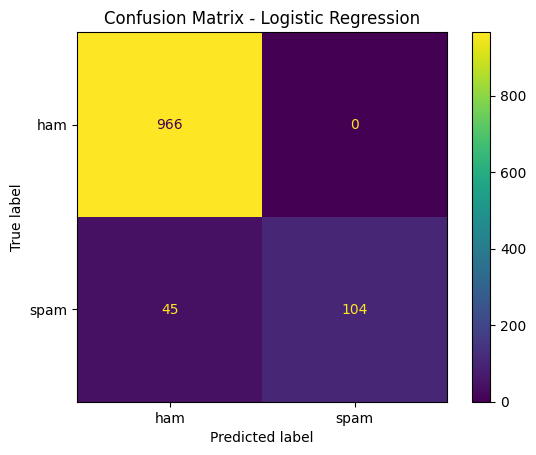

In [24]:
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=logreg.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=logreg.classes_)
disp_lr.plot(values_format="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [25]:
proba_lr = logreg.predict_proba(X_test)
spam_idx_lr = np.where(logreg.classes_ == "spam")[0][0]
spam_proba_lr = proba_lr[:, spam_idx_lr]

for t in [0.2, 0.3, 0.4, 0.5]:
    y_pred_t = np.where(spam_proba_lr >= t, "spam", "ham")
    print("\n[LR] Threshold:", t)
    print("Accuracy:", accuracy_score(y_test, y_pred_t))
    print(classification_report(y_test, y_pred_t, digits=3))


[LR] Threshold: 0.2
Accuracy: 0.9820627802690582
              precision    recall  f1-score   support

         ham      0.991     0.989     0.990       966
        spam      0.927     0.940     0.933       149

    accuracy                          0.982      1115
   macro avg      0.959     0.964     0.961      1115
weighted avg      0.982     0.982     0.982      1115


[LR] Threshold: 0.3
Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

         ham      0.977     0.997     0.987       966
        spam      0.977     0.846     0.906       149

    accuracy                          0.977      1115
   macro avg      0.977     0.921     0.947      1115
weighted avg      0.977     0.977     0.976      1115


[LR] Threshold: 0.4
Accuracy: 0.9757847533632287
              precision    recall  f1-score   support

         ham      0.973     1.000     0.986       966
        spam      1.000     0.819     0.900       149

    accuracy                    